In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show full numbers instead of scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)
df = pd.read_csv("Medical Appointment no shows.csv", encoding = 'latin1')


In [25]:
# Checking the columns
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [26]:
# Renaming columns

df.rename(columns={
    'PatientId': 'Patient ID',
    'AppointmentID': 'Appointment ID',
    'No-show': 'No show', 
    'ScheduledDay': 'Scheduled Day', 
    'AppointmentDay': 'Appointment Day',
    'Handcap' : 'Handicap',
    'SMS_received': 'SMS Received',
}, inplace=True)

In [27]:
df.columns

Index(['Patient ID', 'Appointment ID', 'Gender', 'Scheduled Day',
       'Appointment Day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS Received',
       'No show'],
      dtype='object')

In [28]:
# View column names and data types
df.info()

# Checking for missing values
df.isnull().sum()

# Preview column names
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Patient ID       110527 non-null  float64
 1   Appointment ID   110527 non-null  int64  
 2   Gender           110527 non-null  object 
 3   Scheduled Day    110527 non-null  object 
 4   Appointment Day  110527 non-null  object 
 5   Age              110527 non-null  int64  
 6   Neighbourhood    110527 non-null  object 
 7   Scholarship      110527 non-null  int64  
 8   Hipertension     110527 non-null  int64  
 9   Diabetes         110527 non-null  int64  
 10  Alcoholism       110527 non-null  int64  
 11  Handicap         110527 non-null  int64  
 12  SMS Received     110527 non-null  int64  
 13  No show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Index(['Patient ID', 'Appointment ID', 'Gender', 'Scheduled Day',
       'Appointment Day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS Received',
       'No show'],
      dtype='object')

In [29]:
# Removing duplicates
df = df.drop_duplicates()

# Removing rows with invalid Age values
df = df[df['Age'] >= 0]

In [30]:
# Total missing values per column
print("Missing values in each column:")
print(df.isnull().sum())

# Total missing values in the whole dataset
print("\nTotal missing values in dataset:", df.isnull().sum().sum())

df = df.dropna()

Missing values in each column:
Patient ID         0
Appointment ID     0
Gender             0
Scheduled Day      0
Appointment Day    0
Age                0
Neighbourhood      0
Scholarship        0
Hipertension       0
Diabetes           0
Alcoholism         0
Handicap           0
SMS Received       0
No show            0
dtype: int64

Total missing values in dataset: 0


In [31]:
# Checking how many duplicates exist
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Drop duplicate rows
df = df.drop_duplicates()
print("Duplicates removed. New shape of dataset:", df.shape)


Number of duplicate rows: 0
Duplicates removed. New shape of dataset: (110526, 14)


In [32]:
# Checking current data types
print("Data Types Before Cleaning:")
print(df.dtypes)

Data Types Before Cleaning:
Patient ID         float64
Appointment ID       int64
Gender              object
Scheduled Day       object
Appointment Day     object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hipertension         int64
Diabetes             int64
Alcoholism           int64
Handicap             int64
SMS Received         int64
No show             object
dtype: object


In [33]:
# Converting columns to datetime format
df['Appointment Day'] = pd.to_datetime(df['Appointment Day'])
df['Scheduled Day'] = pd.to_datetime(df['Scheduled Day'])

# Confirm changes
print("\nData Types After Converting Dates:")
print(df.dtypes)



Data Types After Converting Dates:
Patient ID                     float64
Appointment ID                   int64
Gender                          object
Scheduled Day      datetime64[ns, UTC]
Appointment Day    datetime64[ns, UTC]
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handicap                         int64
SMS Received                     int64
No show                         object
dtype: object


In [34]:
# Checking and convert Age column 
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  

df = df.dropna(subset=['Age'])

# Convert to integer
df['Age'] = df['Age'].astype(int)

In [35]:
# Check unique values
print("Unique values in Gender:")
print(df['Gender'].unique())

Unique values in Gender:
['F' 'M']


In [36]:
# Map abbreviations to full words
df['Gender'] = df['Gender'].map({'M': 'Male', 'F': 'Female'})

In [37]:
# Preview
print("Final dataset shape:", df.shape)
print("\nFinal few rows:")
print(df.tail())

print("\nFinal Data Types:")
print(df.dtypes)

Final dataset shape: (110526, 14)

Final few rows:
            Patient ID  Appointment ID  Gender             Scheduled Day  \
110522   2572134369293         5651768  Female 2016-05-03 09:15:35+00:00   
110523   3596266328735         5650093  Female 2016-05-03 07:27:33+00:00   
110524  15576631729893         5630692  Female 2016-04-27 16:03:52+00:00   
110525  92134931435557         5630323  Female 2016-04-27 15:09:23+00:00   
110526 377511518121127         5629448  Female 2016-04-27 13:30:56+00:00   

                 Appointment Day  Age Neighbourhood  Scholarship  \
110522 2016-06-07 00:00:00+00:00   56   MARIA ORTIZ            0   
110523 2016-06-07 00:00:00+00:00   51   MARIA ORTIZ            0   
110524 2016-06-07 00:00:00+00:00   21   MARIA ORTIZ            0   
110525 2016-06-07 00:00:00+00:00   38   MARIA ORTIZ            0   
110526 2016-06-07 00:00:00+00:00   54   MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handicap  SMS Received No show  
110522

In [38]:
# Convert Patient Id to string before saving
df['Patient ID'] = df['Patient ID'].astype(str)


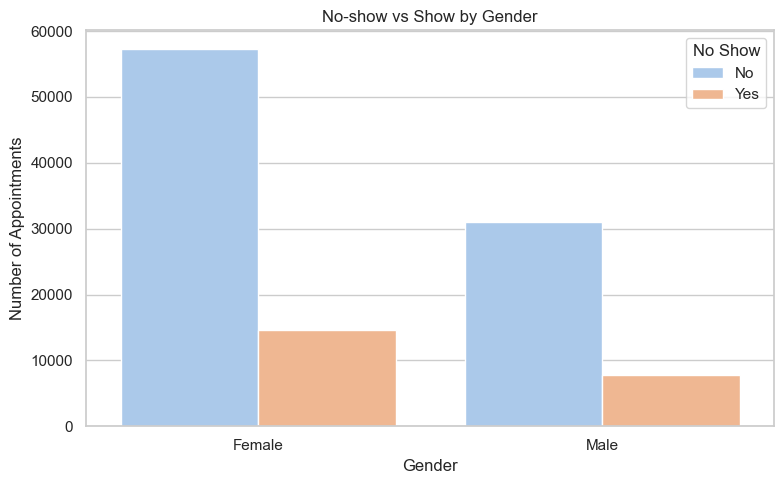

In [39]:
# Visualizing the Data

sns.set(style="whitegrid")

# Plot no-show count by gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='No show', palette='pastel')

# Labels and Title
plt.title('No-show vs Show by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Appointments')
plt.legend(title='No Show', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()

In [40]:
df.to_csv("Cleaned_Medical_Appointment_No_Shows.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!
